# Importing Libraries


In [17]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA
import numpy as np
from sklearn.metrics import adjusted_rand_score, v_measure_score, silhouette_score, davies_bouldin_score, calinski_harabasz_score 

# Loading and Exploring the Data

In [18]:
x = pd.DataFrame(load_iris()['data'], columns = load_iris()['feature_names'])
y = load_iris()['target']

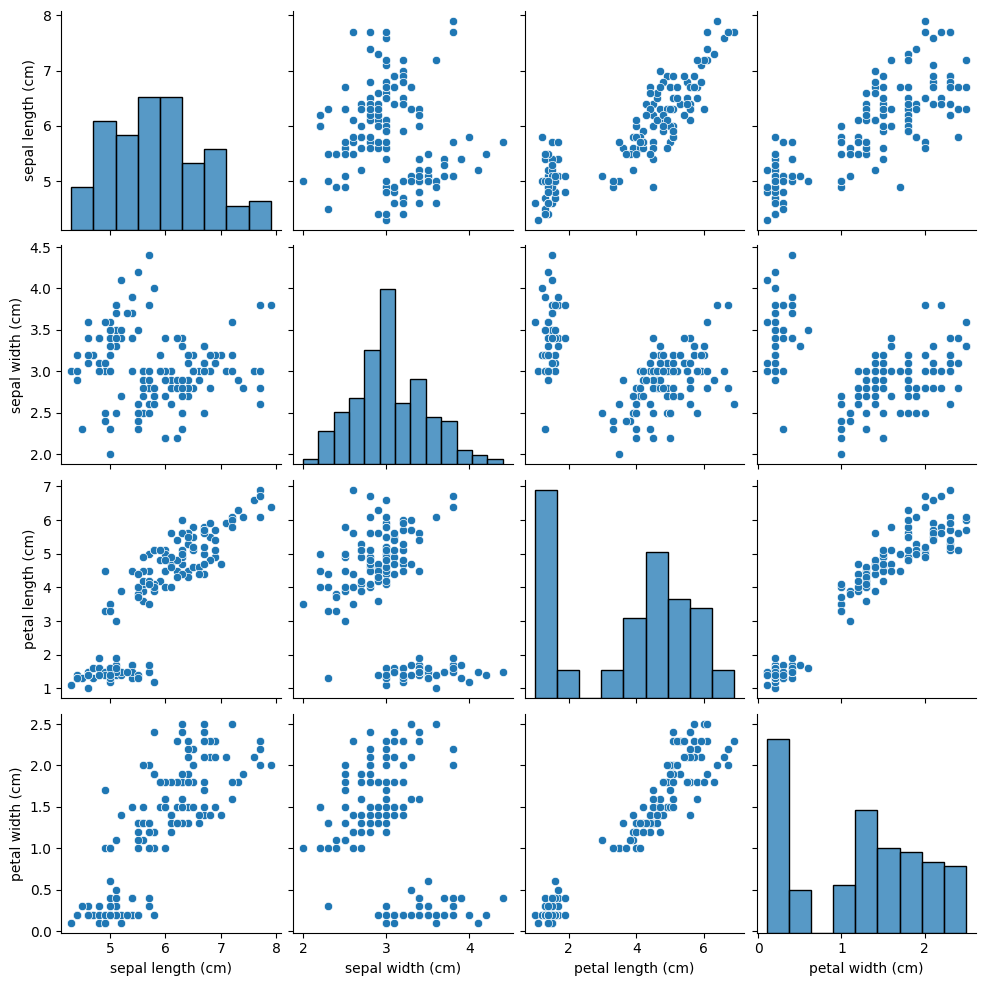

In [19]:
sns.pairplot(x)

## Scaling data

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns = load_iris()['feature_names'])

## Elbow method

In [21]:
def elbow_method(X):
    inertia = []

    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, 11), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('# of Clusters')
    plt.ylabel('inertia')
    plt.show()

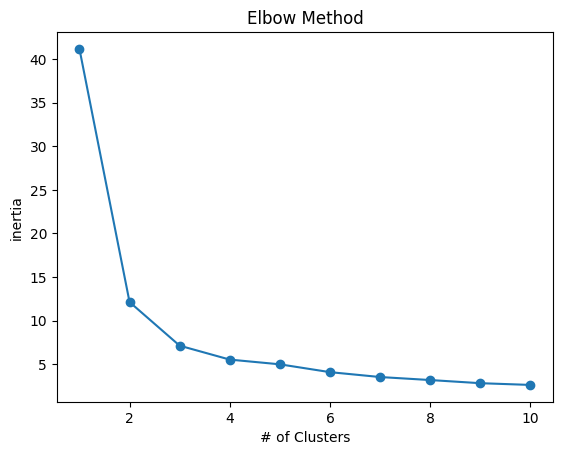

In [22]:
elbow_method(x)

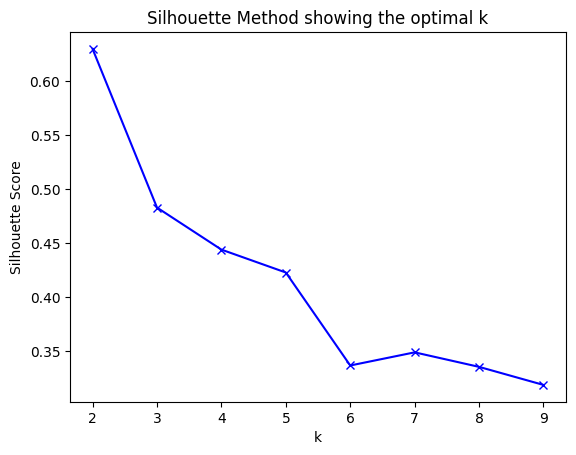

In [23]:
from sklearn.metrics import silhouette_score

silhouette_avg = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(x, labels))

plt.plot(range(2, 10), silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method showing the optimal k')
plt.show()


# Real plot

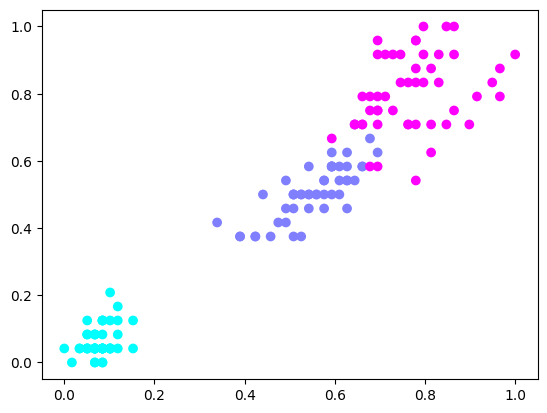

In [24]:
plt.scatter(x.iloc[:,2],x.iloc[:,3],c=y,cmap='cool')

In [25]:
metrics = []
def save_metrics(model,x,y,pred):
    silhouette = silhouette_score(x,pred)
    davies_bouldin = davies_bouldin_score(x,pred)
    adjusted_rand = adjusted_rand_score(y,pred)
    v_measure = v_measure_score(y,pred)
    calinski = calinski_harabasz_score(x,pred)
    
    metrics.append([model,silhouette,davies_bouldin,adjusted_rand,v_measure,calinski])

# KMeans


In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred_kmeans= kmeans.predict(x)
save_metrics('kmeans',x,y,pred_kmeans)

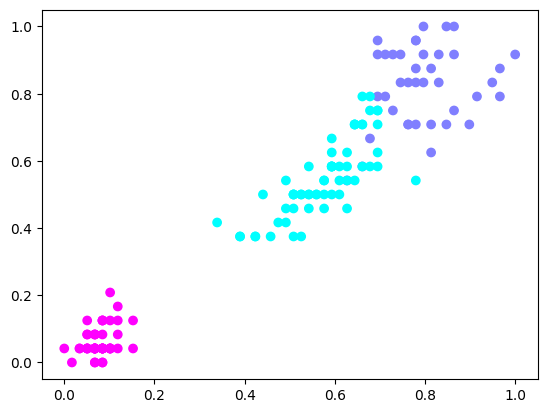

In [27]:
plt.scatter(x.iloc[:,2],x.iloc[:,3],c=pred_kmeans,cmap='cool')

# DBSCAN

In [28]:
dbscan = DBSCAN(eps=0.2, min_samples=9)
pred_dbscan = dbscan.fit_predict(x)
save_metrics('dbscan',x,y,pred_dbscan)

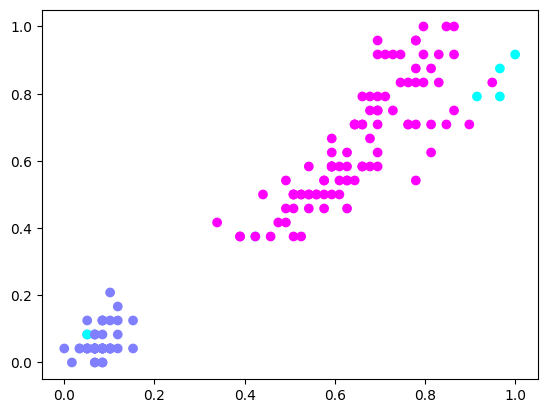

In [29]:
plt.scatter(x.iloc[:,2],x.iloc[:,3],c=pred_dbscan,cmap='cool')

# Agglomerative Clustering 

In [30]:
aggclus = AgglomerativeClustering(n_clusters=3,linkage='ward')
pred_aggclus = aggclus.fit_predict(x)
save_metrics('Agglomerative Clustering',x,y,pred_aggclus)

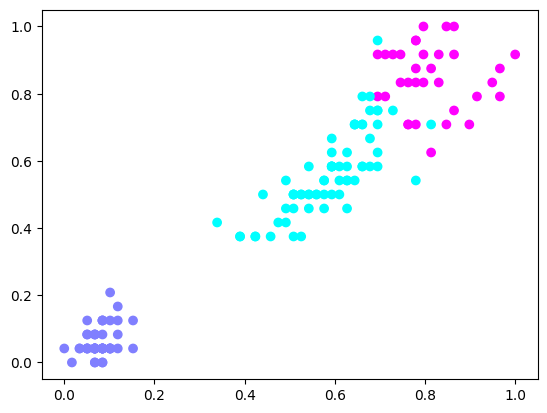

In [31]:
plt.scatter(x.iloc[:,2],x.iloc[:,3],c=pred_aggclus,cmap='cool')

# Results

In summary, given the superior performance of ``KMeans`` on most metrics and its clear visual representation, it can be concluded that this method is the most suitable for clustering on this dataset. Its ability to form distinct and coherent clusters, as well as its alignment with the ground truth labels, make it a robust choice for the clustering task on the analyzed dataset.

In [32]:
pd.DataFrame(metrics,columns= ['model','silhouette','davies_bouldin','adjusted_rand','v_measure','calinski'])

,model,silhouette,davies_bouldin,adjusted_rand,v_measure,calinski
0,kmeans,0.504769,0.760277,0.716342,0.741912,359.845074
1,dbscan,0.523517,3.949325,0.546422,0.664389,164.440374
2,Agglomerative Clustering,0.504800,0.747977,0.719584,0.783740,349.254185
